<a href="https://colab.research.google.com/github/Ramesa1995/Micro_Credential_Data_Analytics/blob/main/CovidProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Set up

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date

#Data Collection


In [ ]:
 df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.head(15)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


#Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
# Dropping fips col
df.drop(labels='fips', axis =1 , inplace = True )

#Dropping county cols
df.drop(labels='county', axis =1 , inplace = True )

# specifying the states which will be analyzed
df = df.loc[df['state'].isin(['New York', 'Florida', 'Texas','Virginia', 'Ohio'])]

#selecting the date range from 2020-01-01 to 2020-12-31
df['date'] = pd.to_datetime(df['date'])
date_from = pd.Timestamp(date(2020,1,1))
date_to = pd.Timestamp(date(2020,12,31))
df = df[
    (df['date'] > date_from ) &
    (df['date'] < date_to)
]

#selecting only december month
date_from1 = pd.Timestamp(date(2020,12,1))
date_to = pd.Timestamp(date(2020,12,31))
dec_data = df[
    (df['date'] > date_from ) &
    (df['date'] < date_to)
]



,date,cases,deaths
state,,,
Florida,19430,19430,19430
New York,16750,16750,16750
Ohio,24754,24754,24754
Texas,66748,66748,66748
Virginia,36753,36753,36753


#Understand NY Covid 19 data in last 30 days

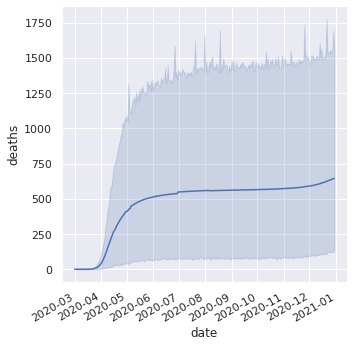

In [177]:
#Seclecting NY states for month of december
dec_NY = dec_data.query('state == "New York"')
dec_NY = dec_NY.set_index("date")
dec_NY.head()
#Visualization of Deaths in December
plot = sns.relplot(x = "date", y = "deaths", kind = "line",data = dec_NY)
plot.fig.autofmt_xdate()



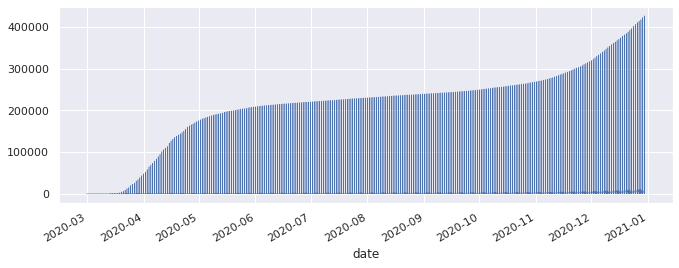

In [ ]:
#Visualization of Case in December
sns.set(rc={'figure.figsize':(11, 4)})
dec_NY['cases'].plot(linewidth=0.5)

In [ ]:
In NY, It looks like in december both deaths and cases went higher.

# Comparing Covid 19 data with different states

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


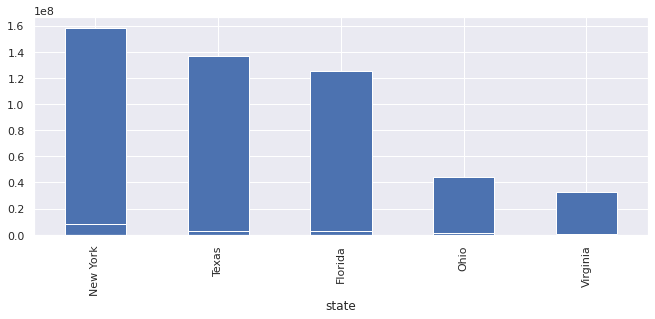

In [186]:
df
# total number of cases of Covid-19 in different states in 2020
print(df.groupby(['state'])['cases'].sum().sort_values(ascending = False).plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


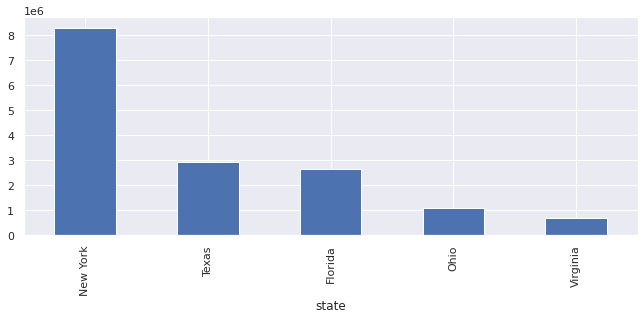

In [187]:
#total number of cases of Covid-19 in different states in 2020
print(df.groupby(['state'])['deaths'].sum().sort_values(ascending = False).plot(kind='bar'))


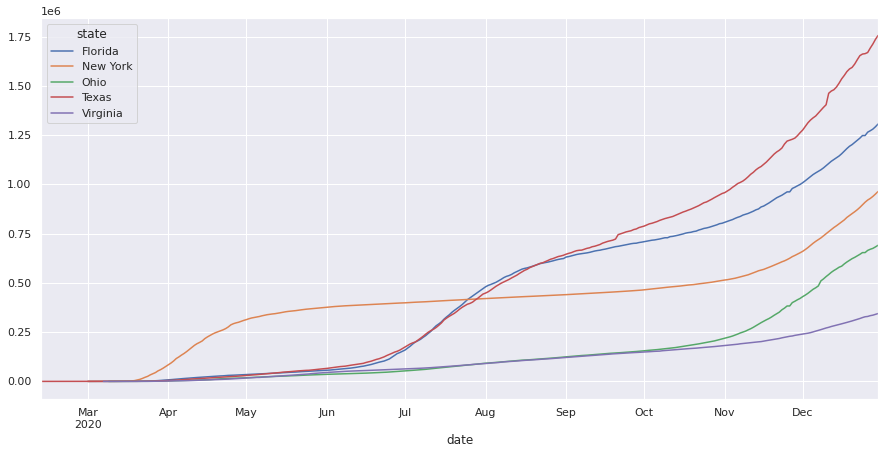

In [200]:
#Visulization of covid case in different states in 2020
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['date','state']).sum()['cases'].unstack().plot(ax=ax)

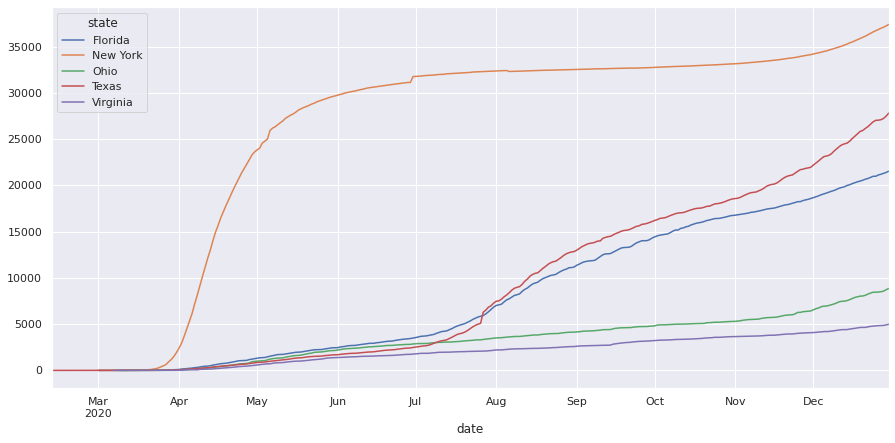

In [201]:
#Visulization of deaths in different states in 2020
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['date','state']).sum()['deaths'].unstack().plot(ax=ax)

From the visualization, we can tell, for all states both Covid-19 cases and deaths increased. Moreover,New York has the most deaths while Texas got more cases. And, Virginia has the least amount of cases and deaths.